In [1]:
# single-cell analysis package
library(Seurat)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)

Attaching SeuratObject

Attaching sp

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




In [23]:
source('../00_preprocessing/preprocessing.R')

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

In [24]:
# obj_other = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_other')
# obj_neuron = qs::qread('..//00_preprocessing/_targets/objects/exp_RElabelled_neuron')
# obj = merge_neuron_and_other(obj_neuron, obj_other)

In [32]:
# obj = obj %>% sc_transform_fgf1

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 22177

Total overdispersed genes: 22000

Excluding 177 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 27177 by 144643

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Setting estimate of  282 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 5105

Total # of Step1 poisson genes (theta=Inf; variance < mean): 307

Total # of poisson genes (theta=Inf; variance < mean): 5223

Calling offset model for all 5223 poisson genes

Found 347 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 5223 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.16

Second step: Get residuals using fitted parameters for 27177 genes



  |======================================================================| 100%


Computing corrected count matrix for 27177 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 25.00323 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.RNA; see ?make.names for more details on syntax validity"
13:06:14 UMAP embedding parameters a = 0.9922 b = 1.112

13:06:14 Read 144643 rows and found 30 numeric columns

13:06:14 Using Annoy for neighbor search, n_neighbors = 30

13:06:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:06:37 Writing NN index file to temp file /scratch/nmq407/R_tmp//RtmpMruFpM/file3a17729e6d40

13:06:37 Searching Annoy index using 1 thread, s

In [33]:
# qs::qsave(obj, 'obj.qs')

In [ ]:
obj = qs::qread('obj.qs')

In [34]:
obj

An object of class Seurat 
59498 features across 144643 samples within 3 assays 
Active assay: SCT (27177 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



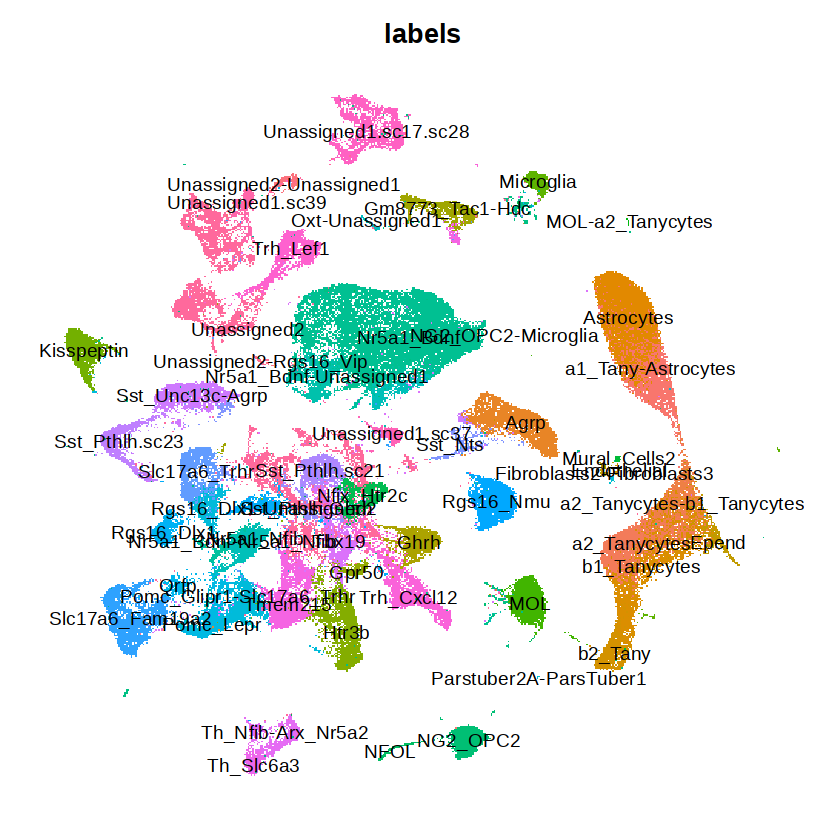

In [35]:
p <- DimPlot(obj, group.by='labels', label=TRUE) +
   umap_theme() + NoLegend()
p

In [67]:
obj@meta.data$seurat_clusters

[1] 2  7  2  7  39 26 38 2  11 2  2  9  7  7  37 26 38 26 7  11 24 19 29 7 
   [25] 26 37 37 2  9  2  7  2  7  7  11 7  2  2  2  2  11 2  9  8  11 2  2  7 
   [49] 11 11 4  2  7  11 2  48 9  11 9  26 28 4  2  9  9  11 4  11 11 50 2  2 
   [73] 2  2  7  7  47 29 2  13 2  7  2  11 11 27 26 39 9  2  15 2  2  9  9  26
   [97] 26 51 33 11 11 11 9  2  2  27 2  7  29 9  51 11 18 11 7  2  9  17 26 2 
  [121] 2  18 11 2  4  2  9  4  4  11 21 7  2  9  30 2  2  2  2  15 2  2  43 2 
  [145] 38 20 9  2  9  29 27 11 38 38 9  38 15 9  50 4  7  9  2  15 27 9  17 11
  [169] 7  7  7  7  17 7  27 4  2  20 2  2  38 37 7  15 45 7  11 29 30 27 48 7 
  [193] 26 2  26 2  8  9  2  5  4  29 11 4  2  24 7  2  2  29 7  37 7  2  38 3 
  [217] 30 32 17 11 38 38 4  2  29 27 30 40 3  2  9  2  4  13 29 9  30 2  7  44
  [241] 43 26 27 9  2  7  27 13 53 7  11 9  32 17 9  29 42 29 4  14 26 3  2  2 
  [265] 39 9  39 2  9  44 4  7  14 41 44 13 38 20 2  4  7  39 5  38 38 2  2  4 
  [289] 26 18 9  8  15 11 5  41 4  7  17 38 32 27 27 4  9  9  24 9  4  2  27 47
  [313] 7  2  18 27 24 26 31 26 11 2  9  11 13 29 2  2  3  2  13 17 13 26 2  17
  [337] 2  26 32 29 11 2  9  42 7  43 47 9  16 32 4  24 30 3  30 26 9  17 7  38
  [361] 18 3  2  26 11 9  16 19 32 18 7  45 5  7  17 25 9  26 11 29 29 31 48 24
  [385] 2  19 27 9  4  21 17 4  11 7  15 41 5  2  9  17 2  39 5  30 30 4  25 39
  [409] 4  7  47 19 27 33 14 2  26 9  24 11 7  31 40 2  45 27 53 24 26 2  7  19
  [433] 27 5  9  3  27 27 43 11 14 20 8  37 27 2  4  2  3  21 31 2  2  9  5  8 
  [457] 18 2  15 2  38 27 9  15 7  2  7  48 2  26 30 7  16 21 3  4  3  3  21 48
  [481] 27 27 9  2  13 7  2  7  4  30 2  3  8  19 30 2  20 29 29 17 39 7  2  24
  [505] 18 11 37 16 3  7  43 19 30 51 32 2  9  27 29 13 19 2  26 20 2  14 4  13
  [529] 16 29 38 26 19 9  7  3  42 7  4  8  4  15 19 19 27 7  4  4  13 27 4  15
  [553] 8  17 2  13 30 9  4  9  2  9  41 11 16 26 51 11 28 2  29 5  30 15 4  24
  [577] 5  7  32 11 8  28 7  33 14 8  51 14 7  9  28 19 2  41 2  6  19 14 30 30
  [601] 2  11 7  7  9  4  19 16 3  2  8  3  38 2  18 19 4  5  30 16 13 18 2  2 
  [625] 33 4  12 25 24 27 16 21 2  18 11 39 9  19 5  30 53 17 9  40 2  44 18 15
  [649] 39 30 17 17 16 3  24 21 25 8  14 19 15 50 9  13 30 8  13 5  30 41 53 11
  [673] 14 5  3  31 2  11 12 3  11 27 40 7  26 14 3  28 5  18 4  12 39 13 53 31
  [697] 7  16 16 8  18 2  20 7  9  43 4  8  5  40 18 8  11 32 13 2  7  2  24 11
  [721] 8  31 7  32 8  5  25 9  2  24 27 4  14 30 4  13 4  31 7  7  19 20 18 2 
  [745] 43 14 51 17 9  41 4  7  38 11 29 18 5  31 3  5  8  19 45 6  29 15 42 27
  [769] 9  17 21 2  20 31 31 4  13 18 8  14 19 19 5  19 27 2  2  19 7  41 50 27
  [793] 2  31 8  39 7  27 42 51 14 50 41 7  26 2  21 19 18 18 11 14 16 2  53 19
  [817] 2  8  11 2  19 3  3  37 2  3  5  16 3  15 17 4  16 3  5  24 5  38 17 29
  [841] 7  32 44 9  11 2  2  19 15 39 31 25 26 19 27 4  24 18 31 12 19 9  11 3 
  [865] 3  7  19 8  3  8  30 29 50 16 27 11 45 25 7  25 14 12 17 6  8  26 11 19
  [889] 30 2  25 33 41 6  24 5  37 37 18 11 17 8  27 28 8  16 13 11 21 37 8  13
  [913] 17 14 19 21 26 9  29 9  4  16 9  25 25 19 16 3  21 43 9  18 4  18 14 13
  [937] 3  2  26 9  25 2  19 11 38 4  11 25 16 11 50 4  31 20 2  9  2  21 31 29
  [961] 20 14 11 2  39 30 19 7  32 8  37 5  16 3  40 29 45 41 35 7  43 17 11 4 
  [985] 26 26 18 4  14 2  2  30 2  3  15 14 5  27 16 3  31 25 16 8  31 8  16 4 
 [1009] 4  7  26 27 4  2  24 7  9  38 18 11 19 8  8  3  44 9  24 25 2  28 24 8 
 [1033] 26 29 31 12 3  2  27 13 13 21 5  28 9  31 51 2  8  18 5  41 8  2  31 4 
 [1057] 27 17 15 4  16 17 7  18 20 19 7  43 27 4  9  7  40 2  25 4  44 9  43 9 
 [1081] 11 12 16 11 2  8  13 6  16 26 16 16 21 25 2  30 26 8  8  4  26 14 32 19
 [1105] 7  3  31 27 9  14 3  52 47 2  31 8  9  30 16 9  2  5  15 7  17 17 16 11
 [1129] 29 13 21 4  7  19 26 41 4  38 30 13 13 3  32 8  45 12 4  13 5  9  11 11
 [1153] 27 14 3  19 8  5  19 11 27 15 38 16 20 4  24 31 9  11 31 39 12 15 2  38
 [1177] 25 5  11 9  24 32 20 17 31 15 18 14 14 4  29 8  2  3  7  24 5  5  9  19
 [12

In [71]:
obj %>%
`[[` %>%
filter(seurat_clusters == '15') %>%
filter(hash.mcl.ID == 'J18')

,orig.ident,nCount_RNA,nFeature_RNA,Index.10x,nCount_HTO,nFeature_HTO,Index.HTO,nCount_spliced,nFeature_spliced,nCount_unspliced,⋯,seurat_clusters,strain,treatment,time,collection_date,isolation_date,batch,predicted.id,prediction.score.max,labels
,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
TCCTCCCAGATGAACT_1_3_1,SI-TT-A12,33427,5589,SI-TT-A12,1171,12,D704,4644,2326,28783,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Nfix_Htr2c,0.5870921,Unassigned2
CACAACATCTTAAGGC_2_3_1,SI-TT-B12,32171,5496,SI-TT-B12,865,12,D705,4565,2280,27606,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Unassigned1,0.4257738,Unassigned2
TTCCGTGGTAGGACTG_2_3_1,SI-TT-B12,30813,5627,SI-TT-B12,956,12,D705,4651,2373,26162,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Unassigned1,0.3401720,Unassigned2
CATAAGCCAGAAACCG_2_3_1,SI-TT-B12,25199,5002,SI-TT-B12,828,12,D705,3594,2012,21605,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Unassigned2,0.5908228,Unassigned2
GTTCGCTTCGTGGACC_2_3_1,SI-TT-B12,25732,5098,SI-TT-B12,842,12,D705,3555,1948,22177,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Trh_Lef1,0.5680822,Unassigned2
TTGTGTTTCGATTGGT_3_3_1,SI-TT-C12,24063,4534,SI-TT-C12,1179,12,D706,3299,1692,20764,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Unassigned2,0.6889370,Unassigned2
CAATGACCATACCATG_4_3_1,SI-TT-E12,27950,5326,SI-TT-E12,1391,12,D707,4086,2102,23864,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Rgs16_Vip,0.3244551,Unassigned2
AGGAATACAAGTATAG_4_3_1,SI-TT-E12,26203,4988,SI-TT-E12,1555,12,D707,3696,1928,22507,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Unassigned1,0.3430905,Unassigned2
CTCACTGGTGACGCCT_4_3_1,SI-TT-E12,24038,5007,SI-TT-E12,1157,12,D707,3578,1983,20460,⋯,15,obob,FGF1,Day14,220131,24/6/2022,Batch 3,Nfix_Htr2c,0.3797361,Nfix_Htr2c


In [36]:
obj <- SetupForWGCNA(
  obj,
  gene_select = "fraction", # the gene selection approach
  fraction = 0.05, # fraction of cells that a gene needs to be expressed in order to be included
  wgcna_name = "tutorial" # the name of the hdWGCNA experiment
)

In [ ]:
# construct metacells  in each group
obj <- MetacellsByGroups(
  seurat_obj = obj,
  group.by = c("labels", "hash.mcl.ID"), # specify the columns in seurat_obj@meta.data to group by
  k = 10, # nearest-neighbors parameter
  max_shared = 10, # maximum number of shared cells between two metacells
  ident.group = 'labels', # set the Idents of the metacell seurat object
  min_cells = 10,
  assay = "RNA",
  slot="counts",
  mode="sum",
  verbose=TRUE
)

Warning message in MetacellsByGroups(seurat_obj = obj, group.by = c("labels", "hash.mcl.ID"), :
"Removing the following groups that did not meet min_cells: Endothelial#J10, Endothelial#J16, Endothelial#J18, Endothelial#J2, Endothelial#J7, Endothelial#M11, Endothelial#M13, Endothelial#M14, Endothelial#M15, Endothelial#M17, Endothelial#M18, Endothelial#M2, Endothelial#M20, Endothelial#M23, Endothelial#M24, Endothelial#M25, Endothelial#M27, Endothelial#M28, Endothelial#M29, Endothelial#M4, Endothelial#M5, Endothelial#M6, Endothelial#M8, Endothelial#M9, Endothelial#N12, Endothelial#N17, Endothelial#N26, Endothelial#N7, Endothelial#N8, Epend#M17, Epend#M20, Epend#M30, Fibroblasts2-Fibroblasts3#J10, Fibroblasts2-Fibroblasts3#J11, Fibroblasts2-Fibroblasts3#J18, Fibroblasts2-Fibroblasts3#J2, Fibroblasts2-Fibroblasts3#J7, Fibroblasts2-Fibroblasts3#M10, Fibroblasts2-Fibroblasts3#M11, Fibroblasts2-Fibroblasts3#M13, Fibroblasts2-Fibroblasts3#M14, Fibroblasts2-Fibroblasts3#M15, Fibroblasts2-Fibrobl

In [77]:
2

[1] 2

In [78]:
qs::qsave(obj, 'obj_metacells.qs')

In [79]:
# normalize metacell expression matrix:
obj <- NormalizeMetacells(obj)

Centering and scaling data matrix

PC_ 1 
Positive:  Ipw, Ank3, Myt1l, Cacna1c, Cacna1e, Nrg3, Erc2, ENSMUSG00000097311, Rims1, Ube3a 
	   Dlgap2, Hecw1, Ptprn2, Snhg11, Usp29, Dscam, Xkr4, Cadps, Celf4, Gria4 
	   Ppfia2, Slc4a10, Stxbp5l, Gabrb3, Dlg2, Cntnap2, ENSMUSG00000109006, Nalf1, Snap25, Dync1i1 
Negative:  Slc1a3, Gramd3, Plpp3, Apoe, Arap2, Cecr2, Slc39a12, Hepacam, Gli3, Nfia 
	   Wwtr1, Mlc1, Prrx1, Soat1, Slc1a2, Son, Dock1, 2610035D17Rik, Tjp2, Acss1 
	   Plscr4, Gja1, Ttc23, Mertk, Lhfp, Sugct, Rgma, Mapk4, Acss3, Crlf3 
PC_ 2 
Positive:  Fa2h, Mag, Prr5l, Mog, A330049N07Rik, Ugt8a, C030029H02Rik, Mobp, Sec14l5, Ninj2 
	   Trf, Mbp, ENSMUSG00000104674, A230001M10Rik, ENSMUSG00000116885, Fbxw15, Opalin, Pstpip2, 1700047M11Rik, Aspa 
	   Sytl2, Rnf220, Mal, Plekhh1, Plp1, ENSMUSG00000109233, Tubb4a, Chdh, D7Ertd443e, Gatm 
Negative:  Nrxn1, Agbl4, Nebl, Nol4, Ccdc85a, Dgkb, Fmn2, Ppp2r2b, Rgs7, Ntrk2 
	   Ppm1e, Nrcam, Zeb1, Ccdc148, Adgrb3, Gria1, Fgf14, Gucy1a2, Tenm3,

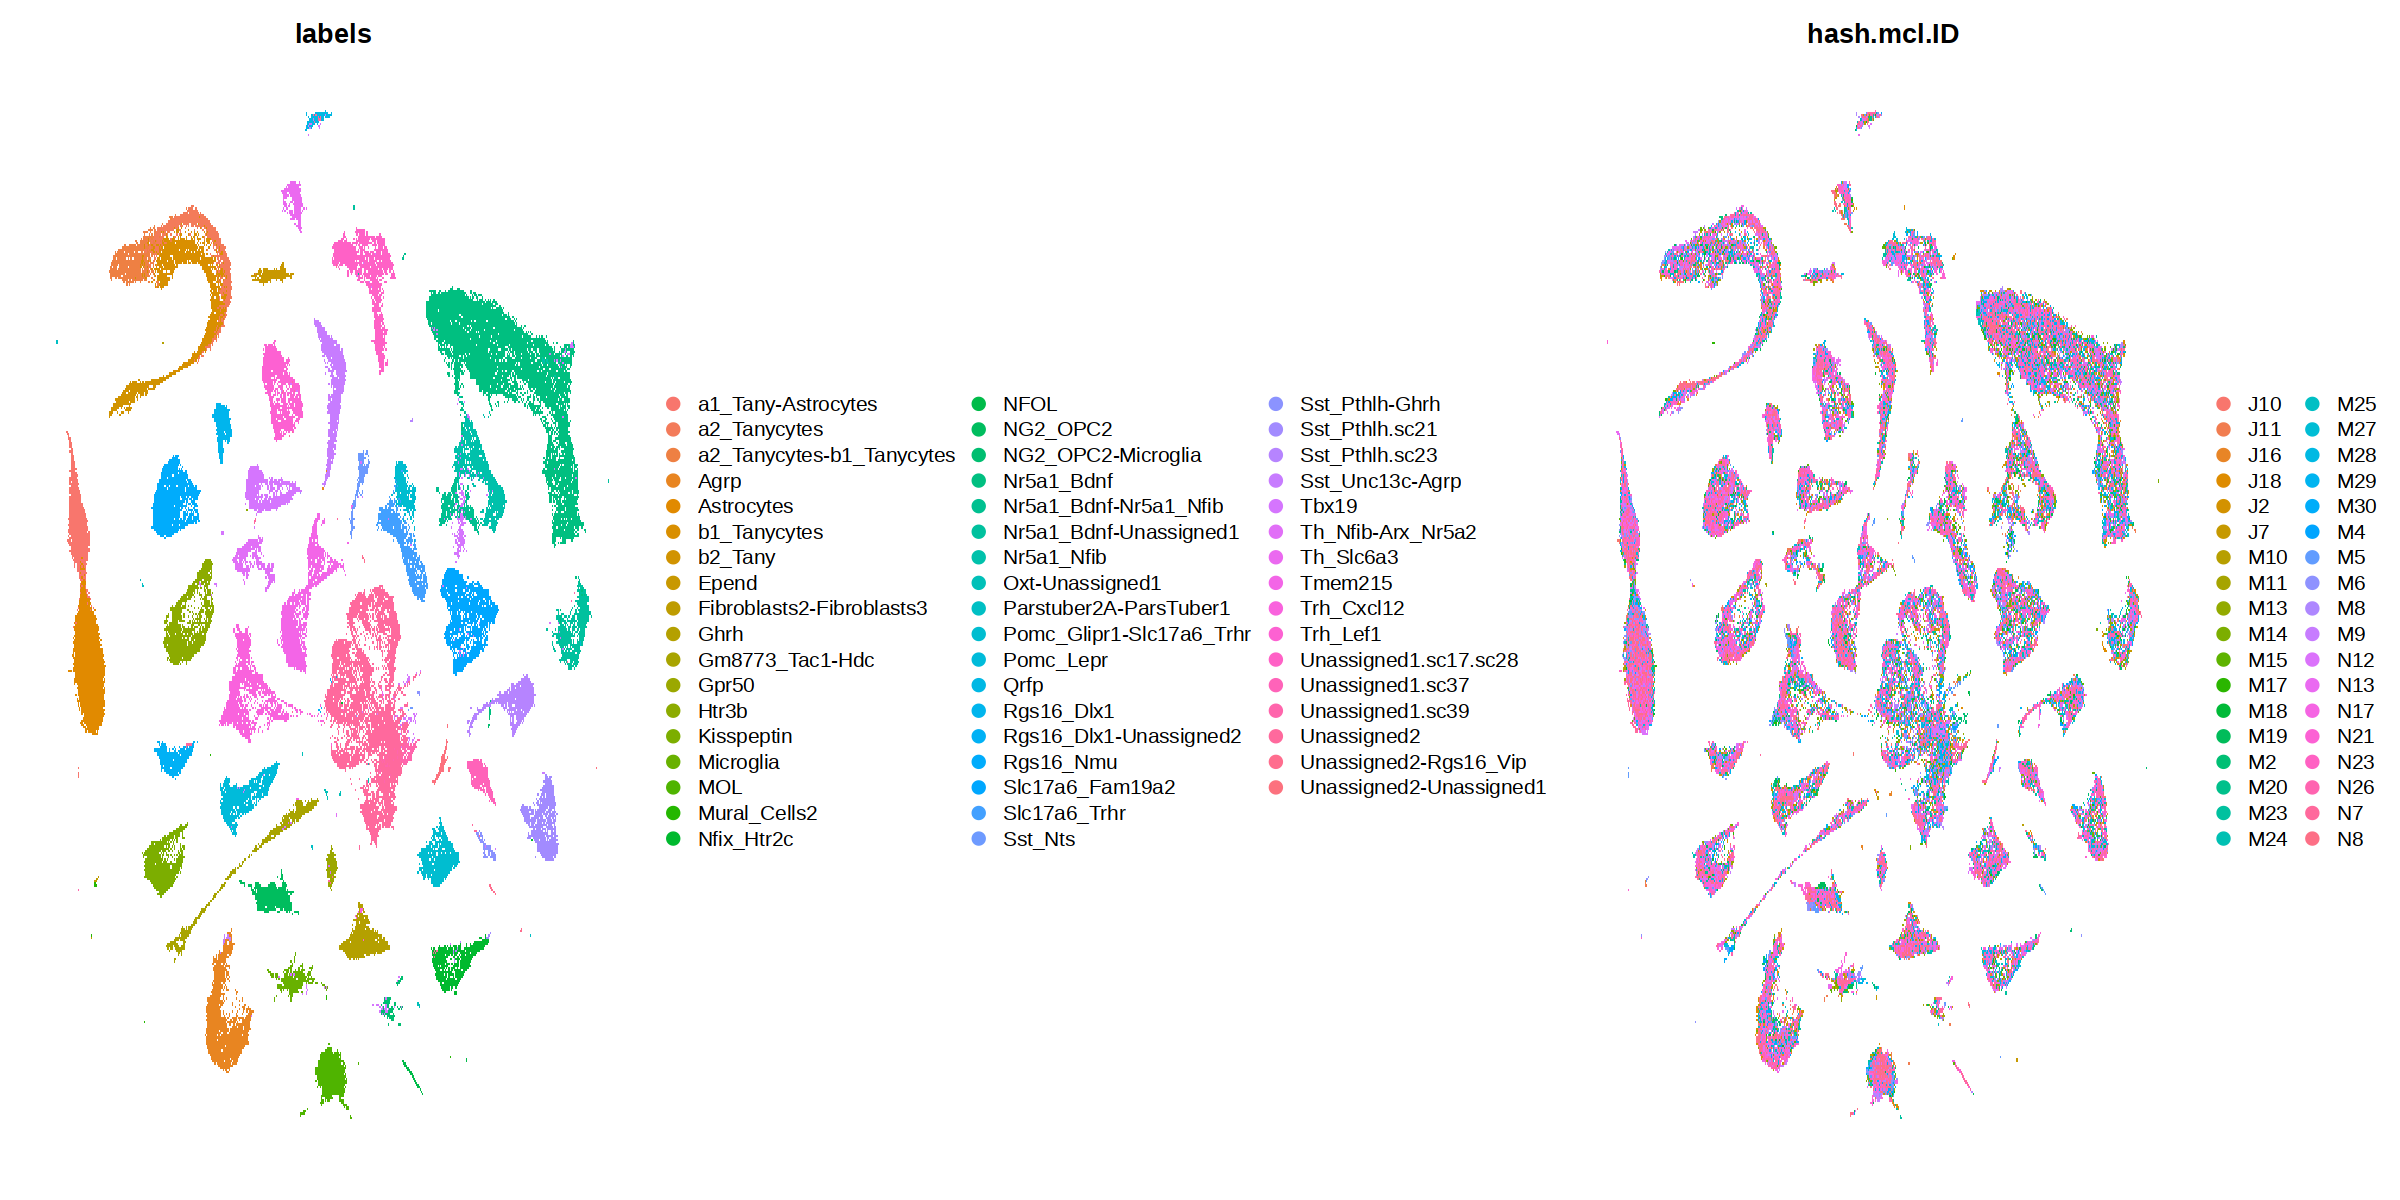

In [80]:
obj <- NormalizeMetacells(obj)
obj <- ScaleMetacells(obj, features=VariableFeatures(obj))
obj <- RunPCAMetacells(obj, features=VariableFeatures(obj))
obj <- RunHarmonyMetacells(obj, group.by.vars="hash.mcl.ID")
obj <- RunUMAPMetacells(obj, reduction='harmony', dims=1:15)


p1 <- DimPlotMetacells(obj, group.by='labels') + umap_theme() + ggtitle("labels")
p2 <- DimPlotMetacells(obj, group.by="hash.mcl.ID") + umap_theme() + ggtitle("hash.mcl.ID")

p1 | p2

In [81]:
qs::qsave(obj, 'obj_metacells_processed.qs')

In [82]:
2

[1] 2

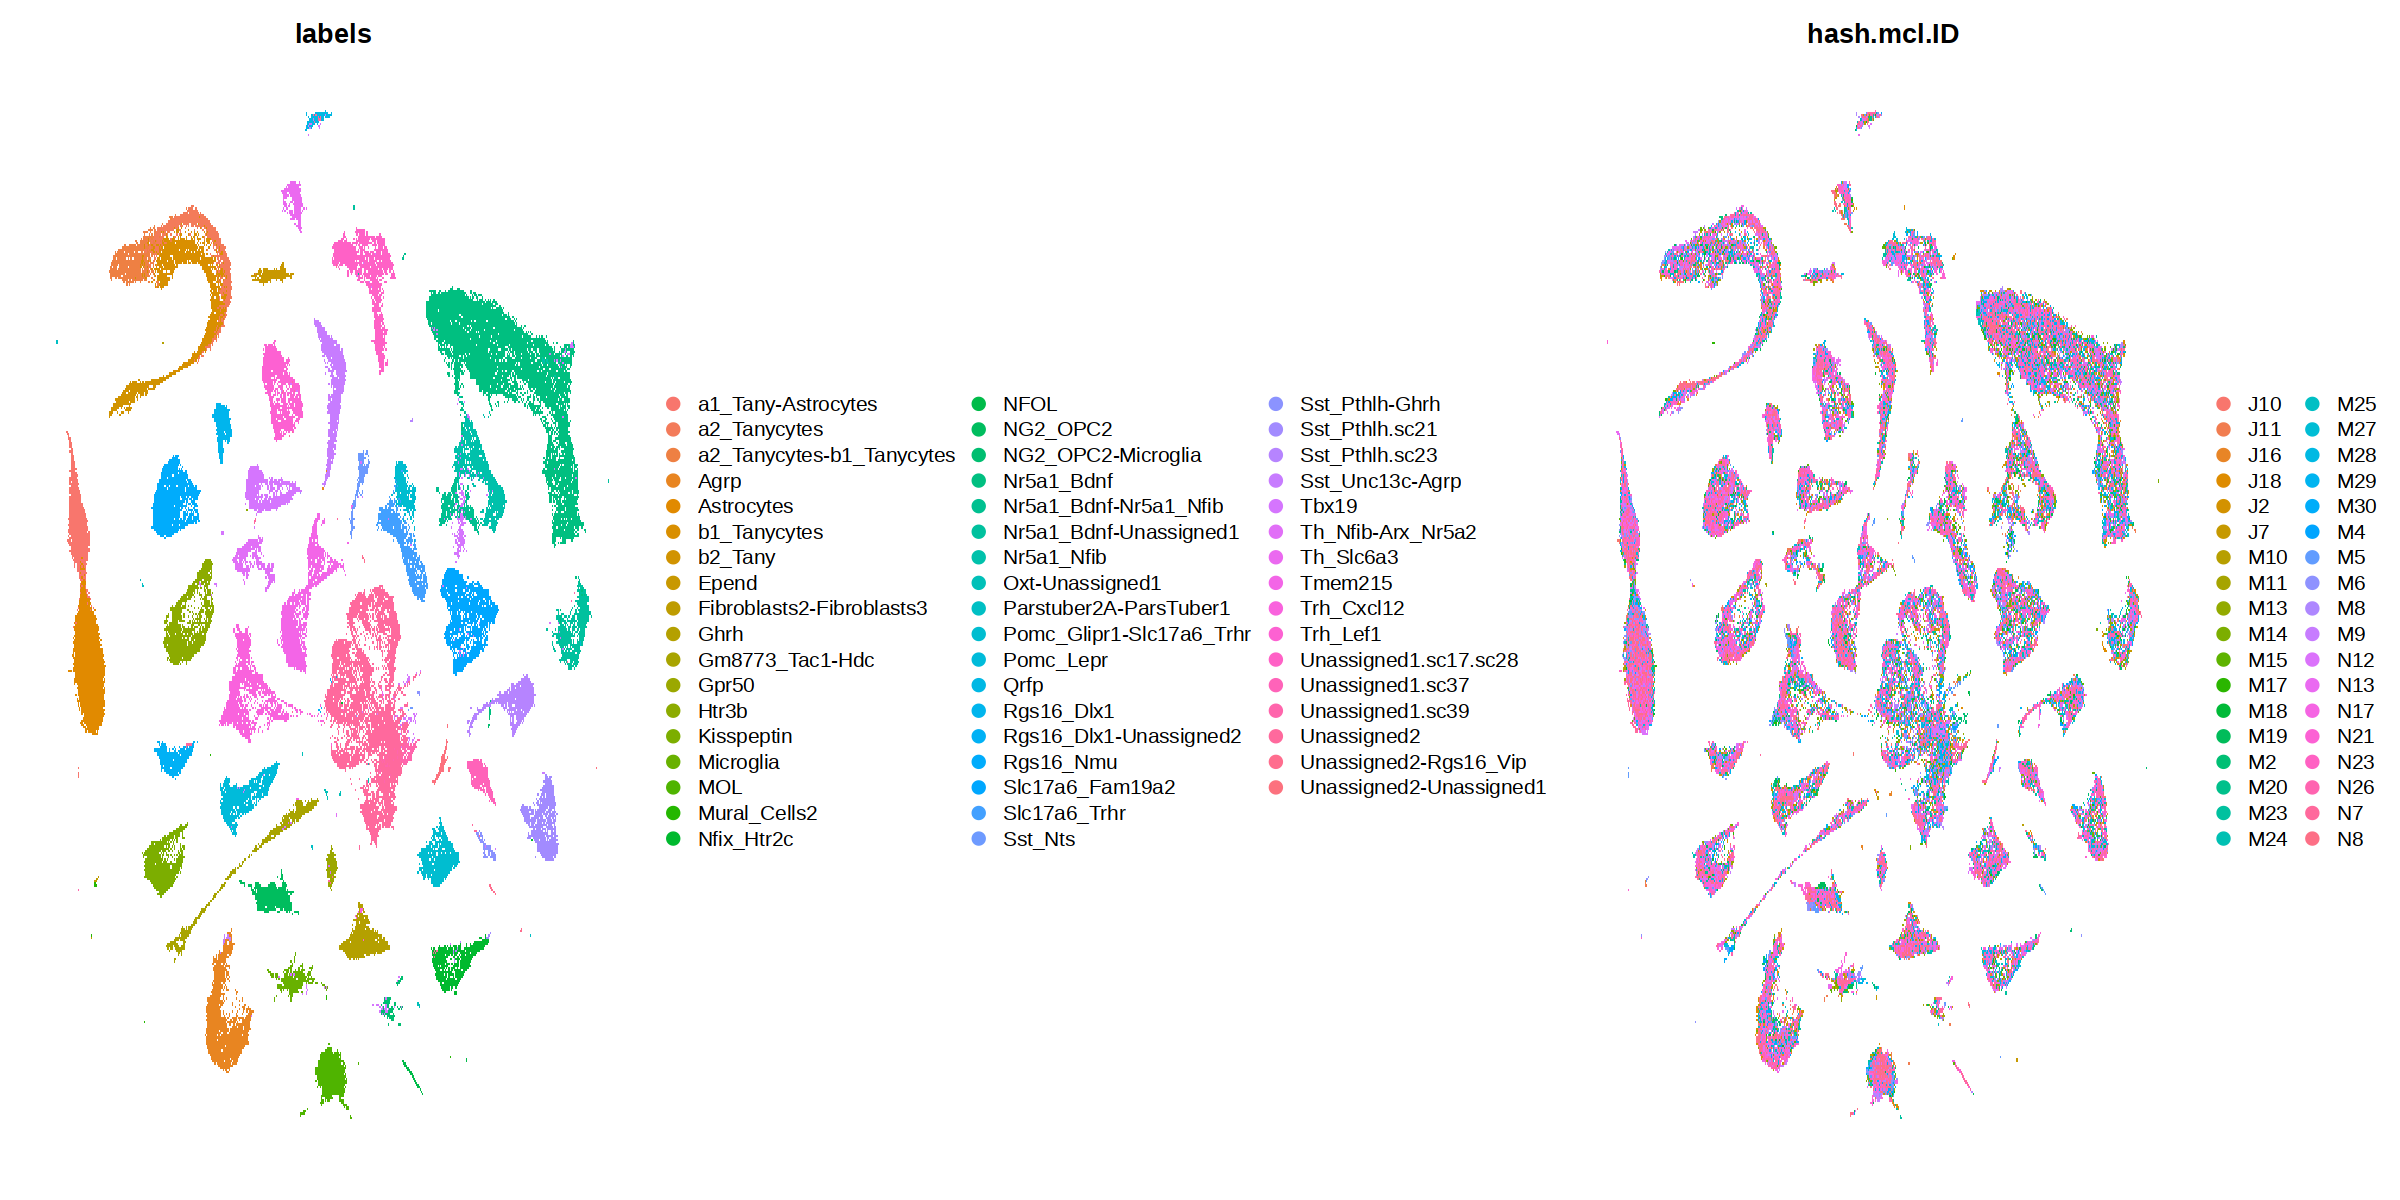

In [83]:
options(repr.plot.width=20, repr.plot.height=10)
p1 | p2

In [97]:
obj <- SetDatExpr(
  obj,
  group_name = "MOL", # the name of the group of interest in the group.by column
  group.by='labels', # the metadata column containing the cell type info. This same column should have also been used in MetacellsByGroups
  assay = 'RNA', # using RNA assay
  slot = 'data' # using normalized data
)

pickSoftThreshold: will use block size 3801.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3801 of 11770


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   ..working on genes 3802 through 7602 of 11770


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   ..working on genes 7603 through 11403 of 11770


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   ..working on genes 11404 through 11770 of 11770


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.   max.k.
1      1  0.04870  63.60          0.760 5.89e+03  5.89e+03 5.97e+03
2      2  0.00285   7.68          0.769 2.95e+03  2.95e+03 3.04e+03
3      3  0.01340 -11.00          0.747 1.48e+03  1.48e+03 1.55e+03
4      4  0.11000 -23.70          0.732 7.47e+02  7.46e+02 7.99e+02
5      5  0.25400 -28.40          0.672 3.76e+02  3.76e+02 4.14e+02
6      6  0.36100 -27.40          0.640 1.90e+02  1.90e+02 2.16e+02
7      7  0.49600 -26.20          0.598 9.61e+01  9.60e+01 1.14e+02
8      8  0.65400 -24.50          0.651 4.87e+01  4.86e+01 6.13e+01
9      9  0.82600 -22.20          0.784 2.47e+01  2.47e+01 3.35e+01
10    10  0.91600 -19.50          0.895 1.26e+01  1.25e+01 1.87e+01
11    12  0.60300 -18.60          0.490 3.27e+00  3.25e+00 6.39e+00
12    14  0.59600 -11.60          0.481 8.59e-01  8.50e-01 2.50e+00
13    16  0.57100  -9.65          0.450 2.27e-01  2.24e-01 1.13e+00
14    18  0.56600  -6.99          0.454 6.09e-02

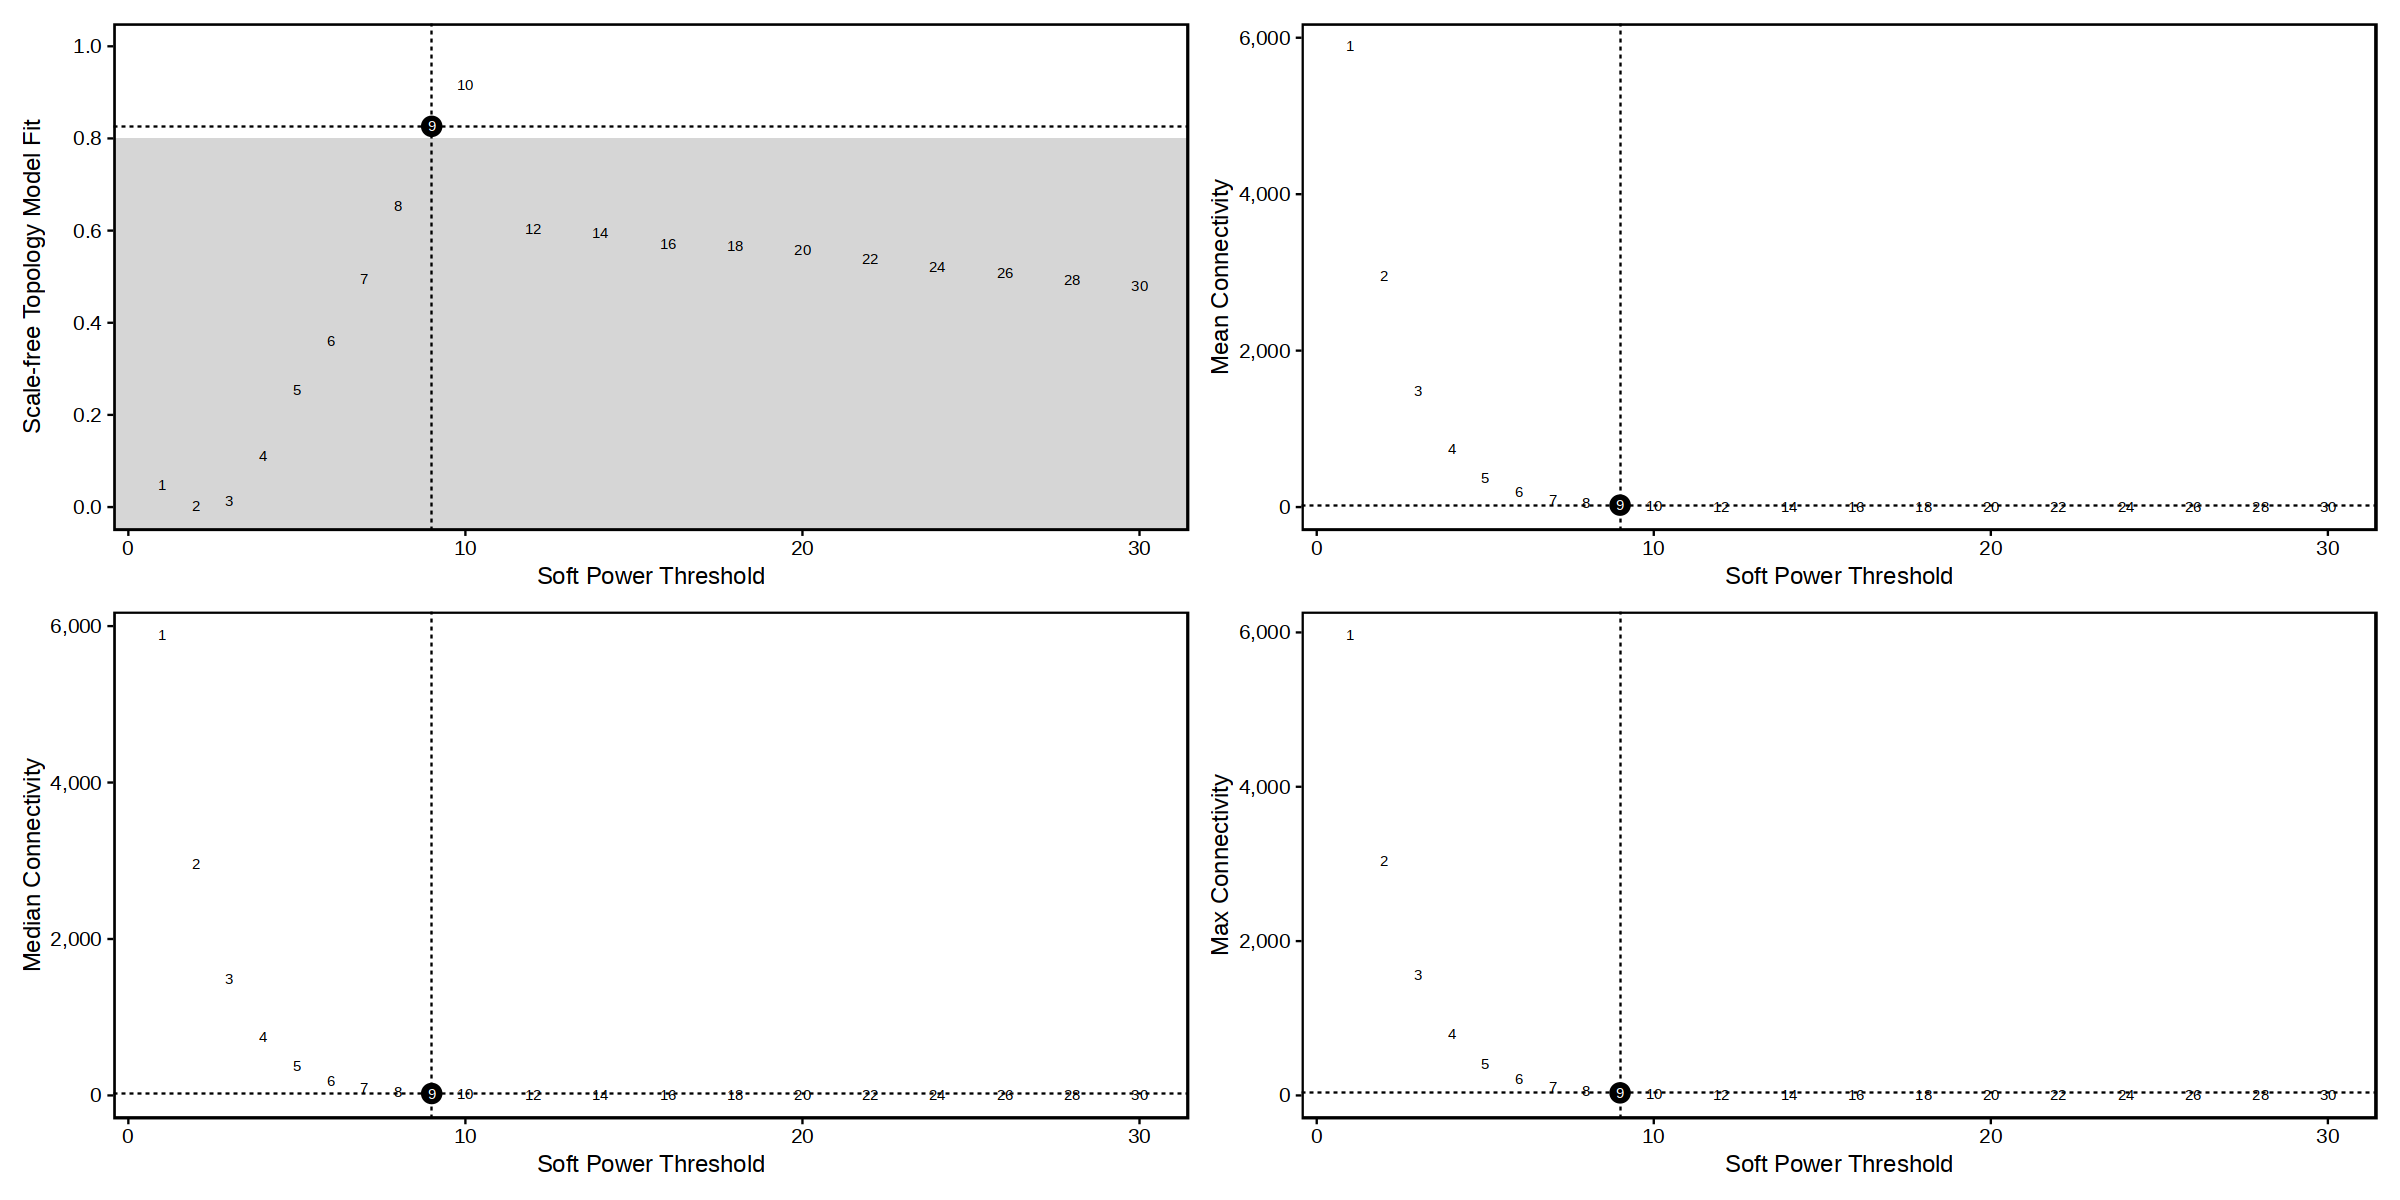

In [101]:
# Test different soft powers:
obj <- TestSoftPowers(
  obj,
  networkType = 'signed' # you can also use "unsigned" or "signed hybrid"
)

# plot the results:
plot_list <- PlotSoftPowers(obj)

# assemble with patchwork
wrap_plots(plot_list, ncol=2)

In [102]:
power_table <- GetPowerTable(obj)
head(power_table, 10)

,Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.048702041,63.565753,0.7601995,5890.81715,5890.51122,5971.23191
2,2,0.002847198,7.679518,0.7694646,2953.74409,2953.26689,3040.27298
3,3,0.013369262,-11.028723,0.7466904,1483.65345,1483.12547,1554.69855
4,4,0.110478184,-23.666724,0.7315541,746.54524,746.09286,799.37414
5,5,0.254493125,-28.381396,0.6719505,376.31073,375.97827,413.87938
6,6,0.360969642,-27.360640,0.6404097,190.02372,189.78660,216.21061
7,7,0.495971999,-26.165467,0.5984131,96.12696,95.95794,114.25532
8,8,0.654280013,-24.524778,0.6512671,48.71538,48.60125,61.27469
9,9,0.826272621,-22.192141,0.7843089,24.73320,24.65812,33.48063


In [103]:
# construct co-expression network:
obj <- ConstructNetwork(
  obj,
  setDatExpr=FALSE,
  tom_name = 'MOL' # name of the topoligical overlap matrix written to disk
)

ERROR: Error in ConstructNetwork(obj, setDatExpr = FALSE, tom_name = "MOL"): TOM TOM/MOL_TOM.rda already exists. Set overwrite_tom = TRUE or change tom_name to proceed.


In [ ]:
PlotDendrogram(obj, main='MOL hdWGCNA Dendrogram')

In [1]:
library(tidyverse)
library(Seurat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Attaching SeuratObject



In [2]:
datExpr = qs::qread('_targets/objects/expr_wgcna_Agrp')

In [3]:
datExpr %>% head

Lypla1,Tcea1,Atp6v1h,Oprk1,Rb1cc1,St18,Pcmtd1,Sgk3,Mcmdc2,Cspp1,⋯,Kdm5d,Eif2s3y,Erdr1.1,Uty,Ddx3y,Usp9y,ENSMUSG00000063897,ENSMUSG00000079834,ENSMUSG00000051412,ENSMUSG00000095041
0.1445908,0.7115323,1.2570375,0.05055577,0.8084973,0.29047383,1.071123,0.07490641,0.2097339,1.0531960,⋯,0.8313375,0.5306574,0.8755100,1.779396,0.4513372,0.02559733,0.1884876,0.6041456,0.1218979,0.6182168
0.2030801,0.4724173,0.9542276,0.00000000,0.9966717,0.03024311,1.041008,0.08811641,0.3358764,1.1074185,⋯,0.8721146,0.5925349,0.6997591,1.671319,0.3996357,0.00000000,0.1158437,0.5282618,0.1249178,0.8678265
0.3070595,0.6067022,1.1575740,0.01275480,1.0422601,0.65452457,1.042260,0.03778649,0.1867981,1.1735805,⋯,0.7376911,0.7191036,0.7438110,1.744638,0.4879590,0.01275480,0.1652694,0.8804622,0.1207696,0.8643676
0.2532238,0.5396815,1.3091029,0.04848988,0.9892741,1.17120479,1.091068,0.02937514,0.3557767,1.1773467,⋯,0.9477797,0.6014522,0.6283161,1.759492,0.4861401,0.01967899,0.1812702,0.7290888,0.1560872,0.8676197
0.2401840,0.6973212,1.2251169,0.03805012,0.9812097,1.05138019,1.242060,0.14421563,0.4337066,0.8899393,⋯,0.8409773,0.6876189,0.5520919,1.701008,0.4337066,0.00000000,0.2401840,0.5408644,0.1442156,0.9057413
0.1520880,0.5126359,0.9227782,0.03720598,0.9717737,0.26486444,1.130598,0.04930659,0.2353468,1.1705809,⋯,0.8817766,0.5050395,0.8335465,1.699827,0.5497758,0.03720598,0.1735616,0.3921452,0.1945837,0.8498830


In [4]:
obj = qs::qread('_targets/objects/obj_Agrp')
obj

An object of class Seurat 
53823 features across 4738 samples within 3 assays 
Active assay: SCT (21502 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
ME = qs::qread('_targets/objects/ME_Agrp')
ME %>% dim

[1] 4738   50

In [6]:
library(limma)

In [7]:
?duplicateCorrelation

dupcor {limma},R Documentation
object,"A matrix-like data object containing log-ratios or log-expression values for a series of samples, with rows corresponding to genes and columns to samples. Any type of data object that can be processed by getEAWP is acceptable."
design,"the design matrix of the microarray experiment, with rows corresponding to arrays and columns to comparisons to be estimated. The number of rows must match the number of columns of object. Defaults to the unit vector meaning that the arrays are treated as replicates."
ndups,a positive integer giving the number of times each gene is printed on an array. nrow(object) must be divisible by ndups. Ignored if block is specified.
spacing,"the spacing between the rows of object corresponding to duplicate spots, spacing=1 for consecutive spots"
block,vector or factor specifying a blocking variable
trim,the fraction of observations to be trimmed from each end of tanh(all.correlations) when computing the trimmed mean.
weights,an optional numeric matrix of the same dimension as object containing weights for each spot. If smaller than object then it will be filled out to the same size.
consensus.correlation,the average estimated inter-duplicate correlation. The average is the trimmed mean of the individual correlations on the atanh-transformed scale.
cor,"same as consensus.correlation, for compatibility with earlier versions of the software"
atanh.correlations,numeric vector of length nrow(object)/ndups giving the individual genewise atanh-transformed correlations.


In [8]:
?eBayes

eBayes {limma},R Documentation
fit,"an MArrayLM fitted model object produced by lmFit or contrasts.fit. For ebayes only, fit can alternatively be an unclassed list produced by lm.series, gls.series or mrlm containing components coefficients, stdev.unscaled, sigma and df.residual."
proportion,"numeric value between 0 and 1, assumed proportion of genes which are differentially expressed"
stdev.coef.lim,"numeric vector of length 2, assumed lower and upper limits for the standard deviation of log2-fold-changes for differentially expressed genes"
trend,"logical, should an intensity-dependent trend be allowed for the prior variance? If FALSE then the prior variance is constant. Alternatively, trend can be a row-wise numeric vector, which will be used as the covariate for the prior variance."
robust,"logical, should the estimation of df.prior and var.prior be robustified against outlier sample variances?"
winsor.tail.p,"numeric vector of length 1 or 2, giving left and right tail proportions of x to Winsorize. Used only when robust=TRUE."
fc,a minimum fold-change below which changes are not considered scientifically meaningful.
lfc,a minimum log2-fold-change below which changes not considered scientifically meaningful. Defaults to log2(fc).
t,numeric matrix of moderated t-statistics.
p.value,numeric matrix of two-sided p-values corresponding to the t-statistics.
